# Identidades de Circuitos Básicos

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

Cuando programamos computadoras cuánticas, nuestro objetivo siempre es construir circuitos cuánticos útiles a partir de los componentes básicos. Pero a veces, es posible que no tengamos todos los componentes básicos que queremos. En esta sección, veremos cómo podemos transformar las compuertas básicas entre sí y cómo usarlas para construir algunas compuertas que son un poco más complejas (pero aún bastante básicas).

Muchas de las técnicas discutidas en este capítulo fueron propuestas por primera vez en un artículo de Barenco y sus coautores en 1995 [1].

## Contenido

1. [Hacer una Z Controlada con un CNOT](#c-from-cnot)
2. [Intercambio de Qubits](#swapping)
3. [Rotaciones Controladas](#controlled-rotations)
4. [La Toffoli](#ccx)
5. [Rotaciones arbitrarias con H y T ](#arbitrary-rotations)
6. [Referencias ](#references)

## 1. Hacer una Z Controlada con un CNOT <a id="c-from-cnot"></a>

La compuerta Z controlada o `cz` es otra compuerta de dos qubits muy utilizada. Así como el CNOT aplica una $X$ a su qubit de destino siempre que su control esté en el estado $|1\rangle$, la $Z$ controlada aplica una $Z$ en el mismo caso. En Qiskit se puede invocar directamente con

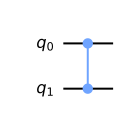

In [2]:
# una Z controlada
qc.cz(c,t)
qc.draw()

donde c y t son los qubits de control y objetivo. Sin embargo, en los dispositivos IBM Q, el único tipo de compuerta de dos qubits que se puede aplicar directamente es el CNOT. Por lo tanto, necesitamos una forma de transformar uno en el otro.

El proceso para esto es bastante simple. Sabemos que la Hadamard transforma los estados $|0\rangle$ y $|1\rangle$ en los estados $|+\rangle$ y $|-\rangle$ respectivamente. También sabemos que el efecto de la compuerta $Z$ en los estados $|+\rangle$ y $|-\rangle$ es el mismo que el de $X$ en los estados $|0\rangle$ y $|1\rangle$ respectivamente. A partir de este razonamiento, o simplemente multiplicando matrices, encontramos que

$$ H X H = Z,\\ H Z H = X. $$

Se puede usar el mismo truco para transformar un CNOT en una $Z$ controlada. Todo lo que tenemos que hacer es preceder y seguir el CNOT con una Hadamard en el qubit objetivo. Esto transformará cualquier $X$ aplicada a ese qubit en una $Z$.

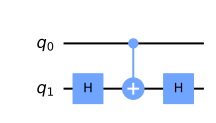

In [3]:
qc = QuantumCircuit(2)
# también una Z controlada
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

Más generalmente, podemos transformar un solo CNOT en una versión controlada de cualquier rotación alrededor de la esfera de Bloch en un ángulo $\pi$, simplemente precediéndolo y siguiéndolo con las rotaciones correctas. Por ejemplo, una $Y$ controlada:

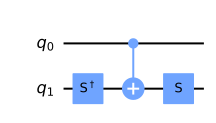

In [4]:
qc = QuantumCircuit(2)
# una Y controlada
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()

y una $H$ controlada:

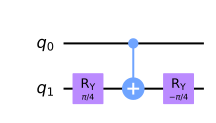

In [5]:
qc = QuantumCircuit(2)
# una H controlada
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

## 2. Intercambio de Qubits <a id="swapping"></a>

In [6]:
a = 0
b = 1

A veces necesitamos mover información en una computadora cuántica. Para algunas implementaciones de qubit, esto podría hacerse moviéndolos físicamente. Otra opción es simplemente mover el estado entre dos qubits. Esto lo hace la compuerta SWAP.

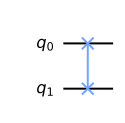

In [7]:
qc = QuantumCircuit(2)
# intercambia los estados de los qubits a y b
qc.swap(a,b)
qc.draw()

El comando anterior invoca directamente esta compuerta, pero veamos cómo podemos hacerlo usando nuestro conjunto de compuertas estándar. Para ello, tendremos que considerar algunos ejemplos.

Primero, veremos el caso en que el qubit a está en el estado $|1\rangle$ y el qubit b está en el estado $|0\rangle$. Para ello aplicaremos las siguientes compuertas:

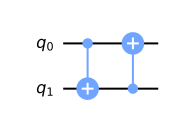

In [8]:
qc = QuantumCircuit(2)
# intercambiar un 1 desde a hacia b
qc.cx(a,b) # copia 1 desde a hacia b
qc.cx(b,a) # usa el 1 en b para rotar el estado de a hacia 0
qc.draw()

Esto tiene el efecto de poner el qubit b en el estado $|1\rangle$ y el qubit a en el estado $|0\rangle$. En este caso, al menos hemos hecho un SWAP.

Ahora tomemos este estado y volvamos al estado original. Como habrás adivinado, podemos hacer esto con el proceso inverso al anterior:

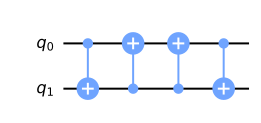

In [9]:
# intercambiar un qubit de b hacia a
qc.cx(b,a) # copia 1 de b hacia a
qc.cx(a,b) # usa el 1 en a para rotar el estado de b hacia 0
qc.draw()

Ten en cuenta que en estos dos procesos, la primera compuerta de uno no tendría efecto sobre el estado inicial del otro. Por ejemplo, cuando intercambiamos el $|1\rangle$ de b hacia a, la primera compuerta es `cx(b,a)`. Si esto se aplicara a un estado en el que inicialmente no hubiera $|1\rangle$ en b, no tendría ningún efecto.

Ten en cuenta también que para estos dos procesos, la compuerta final de uno no tendría ningún efecto sobre el estado final del otro. Por ejemplo, el `cx(b,a)` final que se requiere cuando intercambiamos $|1\rangle$ de a hacia b no tiene ningún efecto en el estado donde el $|1\rangle$ no está en b.

Con estas observaciones, podemos combinar los dos procesos agregando una compuerta sin efecto de uno al otro. Por ejemplo,

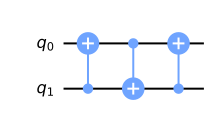

In [10]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

Podemos pensar en esto como un proceso que intercambia un $|1\rangle$ de a hacia b, pero con un `qc.cx(b,a)` inútil al principio. También podemos considerarlo como un proceso que intercambia un $|1\rangle$ de b hacia a, pero con un `qc.cx(b,a)` inútil al final. De cualquier manera, el resultado es un proceso que puede hacer el intercambio en ambos sentidos.

También tiene el efecto correcto en el estado $|00\rangle$. Esto es simétrico, por lo que el intercambio de estados no debería tener ningún efecto. Dado que las compuertas CNOT no tienen efecto cuando sus qubits de control son $|0\rangle$, el proceso correctamente no hace nada.

El estado $|11\rangle$ también es simétrico, por lo que necesita un efecto trivial del intercambio. En este caso, la primera compuerta CNOT del proceso anterior hará que la segunda no tenga efecto y la tercera deshaga la primera. Por lo tanto, todo el efecto es de hecho trivial.

Por lo tanto, hemos encontrado una manera de descomponer las compuertas SWAP en nuestro conjunto de compuertas estándar de rotaciones de un solo qubit y compuertas CNOT.

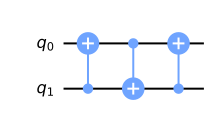

In [11]:
qc = QuantumCircuit(2)
# intercambia los estados de los qubits a y b
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

Funciona para los estados $|00\rangle$, $|01\rangle$, $|10\rangle$ y $|11\rangle$, y si funciona para todos los estados en la base computacional, debe funcionar para todos los estados en general. Por lo tanto, este circuito intercambia todos los estados posibles de dos qubits.

El mismo efecto también resultaría si cambiáramos el orden de las compuertas CNOT:

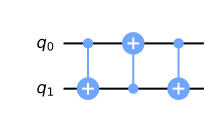

In [12]:
qc = QuantumCircuit(2)
# intercambia los estados de los qubits a y b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

Esta es una forma igualmente válida de obtener la compuerta SWAP.

La derivación utilizada aquí se basó en gran medida en los estados de la base z, pero también se podría hacer pensando en lo que se requiere para intercambiar qubits en los estados $|+\rangle$ y $|-\rangle$. Las formas resultantes de implementar la compuerta SWAP serán completamente equivalentes a las presentadas aquí.

#### Ejercicio Rápido:

- Encuentra un circuito diferente que intercambie qubits en los estados $|+\rangle$ y $|-\rangle$, y demuestra que esto es equivalente al circuito que se muestra arriba.

## 3. Rotaciones Controladas <a id="controlled-rotations"></a>

Ya hemos visto cómo construir rotaciones $\pi$ controladas con una sola compuerta CNOT. Ahora veremos cómo construir cualquier rotación controlada.

Primero, consideremos rotaciones arbitrarias alrededor del eje y. Específicamente, considera la siguiente secuencia de compuertas.

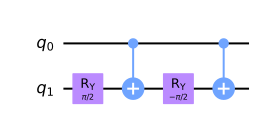

In [13]:
qc = QuantumCircuit(2)
theta = pi # theta puede valer lo que sea (se escoge pi arbitrariamente)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()

Si el qubit de control está en el estado $|0\rangle$, todo lo que tenemos aquí es una $R_y(\theta/2)$ seguida inmediatamente de su inversa, $R_y(-\theta/2)$. El efecto final es trivial. Sin embargo, si el qubit de control está en el estado $|1\rangle$, la `ry(-theta/2)` está efectivamente precedida y seguida por una compuerta X. Esto tiene el efecto de cambiar la dirección de la rotación en y, y hacer una segunda $R_y(\theta/2)$. El efecto neto en este caso es, por lo tanto, hacer una versión controlada de la rotación $R_y(\theta)$.

Este método funciona porque los ejes x e y son ortogonales, lo que hace que las compuertas x cambien la dirección de rotación. Por lo tanto, funciona de manera similar para hacer una $R_z(\theta)$ controlada. De manera similar, se podría hacer una $R_x(\theta)$ controlada usando compuertas CNOT.

También podemos hacer una versión controlada de cualquier rotación de un solo qubit, $V$. Para esto simplemente necesitamos encontrar tres rotaciones A, B y C, y una fase $\alpha$ tal que

$$ ABC = I, ~~~e^{i\alpha}AZBZC = V $$

Luego usamos compuertas Z controladas para hacer que la primera de estas relaciones suceda siempre que el control esté en el estado $|0\rangle$, y la segunda suceda cuando el control esté en el estado $|1\rangle$. También se utiliza una rotación $R_z(2\alpha)$ en el control para obtener la fase correcta, lo cual será importante siempre que haya estados de superposición.

In [14]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # definir alfa arbitrariamente para permitir el dibujo del circuito

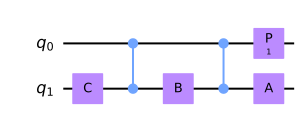

In [15]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw()

![Una versión controlada de una compuerta V](images/iden1.png)

Aquí `A`, `B` y `C` son compuertas que implementan $A$, $B$ y $C$, respectivamente.

## 4. La Toffoli <a id="ccx"></a>

La compuerta Toffoli es una compuerta de tres qubits con dos controles y un objetivo. Realiza una X en el objetivo solo si ambos controles están en el estado $|1\rangle$. El estado final del objetivo es entonces igual al AND o al NAND de los dos controles, dependiendo de si el estado inicial del objetivo era $|0\rangle$ o $|1\rangle$. Una Toffoli también se puede considerar como un NOT-controlado-controlado, y también se le llama compuerta CCX.

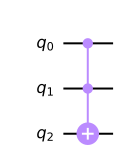

In [16]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli con qubits de control a y b y objetivo t
qc.ccx(a,b,t)
qc.draw()

Para ver cómo construirla a partir de compuertas de uno y dos qubits, es útil mostrar primero cómo construir algo aún más general: una U-controlada-controlada arbitraria para cualquier rotación U de un solo qubit. Para esto, necesitamos definir versiones controladas de $V = \sqrt{U}$ y $V^\dagger$. En el siguiente código, usamos `cp(theta,c,t)` y `cp(-theta,c,t)` en lugar de las subrutinas indefinidas `cv` y `cvdg` respectivamente. Los controles son los qubits $a$ y $b$, y el objetivo es el qubit $t$.

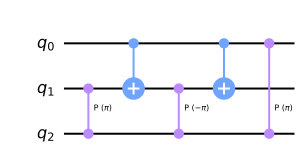

In [17]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw()

![Una versión doblemente controlada de una compuerta V](images/iden2.png)

Al rastrear cada valor de los dos qubits de control, puedes convencerte de que se aplica una compuerta U al qubit objetivo si y solo si ambos controles son 1. Utilizando las ideas que ya hemos descrito, ahora podrías implementar cada compuerta V controlada para llegar a algún circuito para la compuerta U doblemente controlada. Resulta que el número mínimo de compuertas CNOT requeridas para implementar la compuerta Toffoli es seis [2].

![Una Toffoli](images/iden3.png)

Esta es una Toffoli con 3 qubits (q0,q1,q2) respectivamente. En este ejemplo de circuito, q0 está conectado con q2 pero q0 no está conectado con q1.

La Toffoli no es la única forma de implementar una compuerta AND en la computación cuántica. También podríamos definir otras compuertas que tengan el mismo efecto, pero que también introduzcan fases relativas. En estos casos, podemos implementar la compuerta con menos CNOTs.

Por ejemplo, supongamos que usamos las compuertas Hadamard controlada y $Z$ controlada, las cuales pueden implementarse con un solo CNOT. Con estas podemos hacer el siguiente circuito:

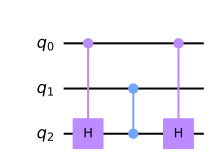

In [18]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()

Para el estado $|00\rangle$ en los dos controles, esto no afecta al objetivo. Para $|11\rangle$, el objetivo experimenta una compuerta $Z$ precedida y seguida por una H. El efecto neto es una $X$ en el objetivo. Para los estados $|01\rangle$ y $|10\rangle$, el objetivo experimenta solo las dos Hadamards (que se anulan entre sí) o solo $Z$ (que solo induce una fase relativa). Por lo tanto, esto también reproduce el efecto de un AND, porque el valor del objetivo únicamente cambia para el estado $|11\rangle$ en los controles, pero lo hace con el equivalente de solo tres compuertas CNOT.

## 5. Rotaciones arbitrarias con H y T <a id="arbitrary-rotations"></a>

Los qubits en los dispositivos actuales están sujetos a ruido, que básicamente consiste en compuertas que se realizan por error. Cosas simples como la temperatura, los campos magnéticos perdidos o la actividad en los qubits vecinos pueden hacer que sucedan cosas que no pretendíamos.

Para grandes aplicaciones de computadoras cuánticas, será necesario codificar nuestros qubits de forma que los proteja de este ruido. Esto se hace haciendo que las compuertas sean mucho más difíciles de aplicar por error, o de implementarlas de una manera ligeramente incorrecta.

Esto es desafortunado para las rotaciones de un solo qubit $R_x(\theta)$, $R_y(\theta)$ y $R_z(\theta)$. Es imposible implementar un ángulo $\theta$ con perfecta precisión, de modo que estés seguro de que no estás implementando accidentalmente algo como $\theta + 0.0000001$. Siempre habrá un límite para la precisión que podemos lograr, y siempre será mayor de lo tolerable cuando tengamos en cuenta la acumulación de imperfecciones en circuitos grandes. Por lo tanto, no podremos implementar estas rotaciones directamente en computadoras cuánticas tolerantes a fallas, sino que necesitaremos construirlas de una manera mucho más deliberada.

Los esquemas tolerantes a fallas generalmente realizan estas rotaciones usando múltiples aplicaciones de solo dos compuertas: $H$ y $T$.

La compuerta T se expresa en Qiskit como `.t()`:

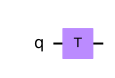

In [19]:
qc = QuantumCircuit(1)
qc.t(0) # compuerta T en el qubit 0
qc.draw()

Es una rotación alrededor del eje z por $\theta = \pi/4$, por lo que se expresa matemáticamente como $R_z(\pi/4) = e^{i\pi/8~Z}$.

A continuación suponemos que las compuertas $H$ y $T$ son efectivamente perfectas. Esto se puede diseñar mediante métodos adecuados para la corrección de errores y la tolerancia a fallos.

Usando Hadamard y los métodos discutidos en el último capítulo, podemos usar la compuerta T para crear una rotación similar alrededor del eje x.

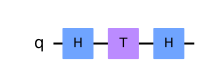

In [20]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

Ahora vamos a poner las dos juntas. Hagamos la compuerta $R_z(\pi/4)~R_x(\pi/4)$.

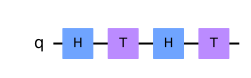

In [21]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()

Dado que se trata de una compuerta de un solo qubit, podemos pensar en ella como una rotación alrededor de la esfera de Bloch. Eso significa que es una rotación alrededor de algún eje por algún ángulo. No necesitamos pensar demasiado en el eje aquí, pero claramente no será simplemente x, y o z. Más importante es el ángulo.

La propiedad crucial del ángulo para esta rotación es que es un múltiplo irracional de $\pi$. Puedes probar esto tu mismo con un montón de matemáticas, pero también puedes ver la irracionalidad en acción aplicando la compuerta. Teniendo en cuenta que cada vez que aplicamos una rotación mayor a $2\pi$, estamos haciendo un módulo implícito de $2\pi$ en el ángulo de rotación. Por lo tanto, repetir la rotación combinada mencionada anteriormente $n$ veces da como resultado una rotación alrededor del mismo eje en un ángulo diferente. Como sugerencia para una demostración rigurosa, recuerda que un número irracional no se puede escribir como ¿qué cosa?

Podemos usar esto a nuestro favor. Cada ángulo estará entre $0$ y $2\pi$. Dividamos este intervalo en $n$ cortes de ancho $2\pi/n$. Por cada repetición, el ángulo resultante caerá en una de estas rebanadas. Si nos fijamos en los ángulos de las primeras $n+1$ repeticiones, debe ser cierto que al menos una rebanada contiene dos de estos ángulos debido al principio del palomar. Utilicemos $n_1$ para indicar el número de repeticiones requeridas para el primero y $n_2$ para el segundo.

Con esto, podemos probar algo sobre el ángulo para $n_2-n_1$ repeticiones. Esto es efectivamente lo mismo que hacer $n_2$ repeticiones, seguido de lo contrario de $n_1$ repeticiones. Dado que los ángulos para estos no son iguales (debido a la irracionalidad) pero también difieren en no más de $2\pi/n$ (porque corresponden a la misma rebanada), el ángulo para $n_2-n_1$ repeticiones satisface

$$ \theta_{n_2-n_1} \neq 0, ~~~~-\frac{2\pi}{n} \leq \theta_{n_2-n_1} \leq \frac{2\pi}{n} . $$

Por lo tanto, tenemos la capacidad de hacer rotaciones alrededor de ángulos pequeños. Podemos usar esto para rotar alrededor de ángulos tan pequeños como queramos, simplemente aumentando el número de veces que repetimos esta compuerta.

Al usar muchas rotaciones de ángulo pequeño, también podemos rotar en cualquier ángulo que queramos. Esto no siempre será exacto, pero se garantiza que será exacto hasta $2\pi/n$, que puede hacerse tan pequeño como queramos. Ahora tenemos poder sobre las imprecisiones en nuestras rotaciones.

Hasta ahora, solo tenemos el poder de hacer estas rotaciones arbitrarias alrededor de un eje. Para un segundo eje, simplemente hacemos las rotaciones $R_z(\pi/4)$ y $R_x(\pi/4)$ en el orden opuesto.

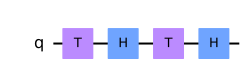

In [22]:
qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

El eje que corresponde a esta rotación no es el mismo que el de la compuerta considerada anteriormente. Por lo tanto, ahora tenemos una rotación arbitraria alrededor de dos ejes, que puede usarse para generar cualquier rotación arbitraria alrededor de la esfera de Bloch. Volvemos a poder hacer todo, aunque cuesta bastantes compuertas $T$.

Es por este tipo de aplicación que las compuertas $T$ son tan prominentes en la computación cuántica. De hecho, la complejidad de los algoritmos para computadoras cuánticas tolerantes a fallas a menudo se cita en términos de cuántas compuertas $T$ necesitarán. Esto motiva la búsqueda para lograr cosas con la menor cantidad posible de compuertas $T$. Ten en cuenta que la discusión anterior simplemente pretendía demostrar que las compuertas $T$ se pueden usar de esta manera y no representa el método más eficiente que conocemos.

## 6. Referencias <a id="references"></a>

[1] [Barenco, *et al.* 1995](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457?cm_mc_uid=43781767191014577577895&cm_mc_sid_50200000=1460741020)

[2] [Shende and Markov, 2009](http://dl.acm.org/citation.cfm?id=2011799)

In [23]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/divs/anaconda3/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.1
qiskit-aer,0.8.2
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.4
qiskit,0.29.0
qiskit-nature,0.1.5
qiskit-finance,0.2.0
qiskit-optimization,0.2.1
qiskit-machine-learning,0.2.0
